# 实例：用随机森林回归填补缺失值

# 1. 导库

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

# 2. 导入数据集，探索

In [6]:
dataset = load_iris()

dataset.data.shape

(150, 4)

In [7]:
X_full, y_full = dataset.data, dataset.target
n_samples = X_full.shape[0]
n_features = X_full.shape[1]

In [13]:
n_samples

150

In [14]:
n_features

4

# 3. 放入缺失值

In [8]:
#首先确定我们希望放入的缺失数据的比例，在这里我们假设是50%，那总共就要有150*4/2个数据缺失
rng = np.random.RandomState(0)
missing_rate = 0.5
n_missing_samples = int(np.floor(n_samples * n_features * missing_rate))

#np.floor向下取整，返回.0格式的浮点数

In [9]:
n_missing_samples

300

In [16]:
#所有数据要随机遍布在数据集的各行各列当中，而一个缺失的数据会需要一个行索引和一个列索引
#如果能够创造一个数组，包含3289个分布在0~506中间的行索引，和3289个分布在0~13之间的列索引，那我们就可
#以利用索引来为数据中的任意3289个位置赋空值
#然后我们用0，均值和随机森林来填写这些缺失值，然后查看回归的结果

# randint(下限，上限，n)在下限和上限之间取出n个整数
missing_features = rng.randint(0,n_features,n_missing_samples)
missing_samples = rng.randint(0,n_samples,n_missing_samples)

In [17]:
#missing_samples = rng.choice(dataset.data.shape[0],n_missing_samples,replace=False)
#我们现在采样了3289个数据，远远超过我们的样本量506，所以我们使用随机抽取的函数randint。但如果我们需要
#的数据量小于我们的样本量506，那我们可以采用np.random.choice来抽样，choice会随机抽取不重复的随机数，
#因此可以帮助我们让数据更加分散，确保数据不会集中在一些行中
X_missing = X_full.copy()
y_missing = y_full.copy()

X_missing[missing_samples,missing_features] = np.nan

X_missing = pd.DataFrame(X_missing)
#转换成DataFrame是为了后续方便各种操作，numpy对矩阵的运算速度快到拯救人生，但是在索引等功能上却不如
#pandas来得好用

# 4. 使用0和均值填补缺失值

In [18]:
#使用均值进行填补
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')# 实例化
X_missing_mean = imp_mean.fit_transform(X_missing)# 训练+导出 fit+predict

In [20]:
X_missing_mean

array([[5.74942529, 3.02708333, 1.4       , 0.2       ],
       [4.9       , 3.        , 1.4       , 0.2       ],
       [4.7       , 3.02708333, 1.3       , 1.10786517],
       [5.74942529, 3.1       , 3.73085106, 0.2       ],
       [5.        , 3.6       , 3.73085106, 1.10786517],
       [5.74942529, 3.9       , 1.7       , 0.4       ],
       [5.74942529, 3.4       , 3.73085106, 0.3       ],
       [5.74942529, 3.02708333, 1.5       , 0.2       ],
       [4.4       , 2.9       , 1.4       , 1.10786517],
       [4.9       , 3.02708333, 3.73085106, 0.1       ],
       [5.4       , 3.7       , 1.5       , 0.2       ],
       [4.8       , 3.4       , 1.6       , 0.2       ],
       [5.74942529, 3.        , 1.4       , 0.1       ],
       [5.74942529, 3.02708333, 3.73085106, 0.1       ],
       [5.8       , 4.        , 3.73085106, 0.2       ],
       [5.7       , 4.4       , 1.5       , 1.10786517],
       [5.4       , 3.9       , 3.73085106, 0.4       ],
       [5.1       , 3.02708333,

In [19]:
pd.DataFrame(X_missing_mean).isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [21]:
#使用0进行填补
imp_0 = SimpleImputer(missing_values=np.nan, strategy="constant",fill_value=0)
X_missing_0 = imp_0.fit_transform(X_missing)

X_missing_0

array([[0. , 0. , 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 0. , 1.3, 0. ],
       [0. , 3.1, 0. , 0.2],
       [5. , 3.6, 0. , 0. ],
       [0. , 3.9, 1.7, 0.4],
       [0. , 3.4, 0. , 0.3],
       [0. , 0. , 1.5, 0.2],
       [4.4, 2.9, 1.4, 0. ],
       [4.9, 0. , 0. , 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [0. , 3. , 1.4, 0.1],
       [0. , 0. , 0. , 0.1],
       [5.8, 4. , 0. , 0.2],
       [5.7, 4.4, 1.5, 0. ],
       [5.4, 3.9, 0. , 0.4],
       [5.1, 0. , 1.4, 0.3],
       [5.7, 0. , 0. , 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0. ],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 0. , 0. , 0. ],
       [5.1, 3.3, 1.7, 0.5],
       [0. , 3.4, 1.9, 0. ],
       [0. , 0. , 1.6, 0.2],
       [0. , 3.4, 0. , 0.4],
       [0. , 3.5, 1.5, 0. ],
       [0. , 0. , 0. , 0.2],
       [4.7, 3.2, 1.6, 0. ],
       [4.8, 3.1, 0. , 0.2],
       [5.4, 3.4, 0. , 0.4],
       [0. , 0. , 1.5, 0.1],
       [0. , 0. , 1.4, 0.2],
       [4.9, 0

# 5. 使用随机森林填补缺失值

In [22]:
"""
使用随机森林回归填补缺失值
任何回归都是从特征矩阵中学习，然后求解连续型标签y的过程，之所以能够实现这个过程，是因为回归算法认为，特征
矩阵和标签之前存在着某种联系。实际上，标签和特征是可以相互转换的，比如说，在一个“用地区，环境，附近学校数
量”预测“房价”的问题中，我们既可以用“地区”，“环境”，“附近学校数量”的数据来预测“房价”，也可以反过来，
用“环境”，“附近学校数量”和“房价”来预测“地区”。而回归填补缺失值，正是利用了这种思想。

对于一个有n个特征的数据来说，其中特征T有缺失值，我们就把特征T当作标签，其他的n-1个特征和原本的标签组成新
的特征矩阵。那对于T来说，它没有缺失的部分，就是我们的Y_test，这部分数据既有标签也有特征，而它缺失的部
分，只有特征没有标签，就是我们需要预测的部分。
特征T不缺失的值对应的其他n-1个特征 + 本来的标签：X_train
特征T不缺失的值：Y_train
特征T缺失的值对应的其他n-1个特征 + 本来的标签：X_test
特征T缺失的值：未知，我们需要预测的Y_test
这种做法，对于某一个特征大量缺失，其他特征却很完整的情况，非常适用。

那如果数据中除了特征T之外，其他特征也有缺失值怎么办？

答案是遍历所有的特征，从缺失最少的开始进行填补（因为填补缺失最少的特征所需要的准确信息最少）。
填补一个特征时，先将其他特征的缺失值用0代替，每完成一次回归预测，就将预测值放到原本的特征矩阵中，再继续填
补下一个特征。每一次填补完毕，有缺失值的特征会减少一个，所以每次循环后，需要用0来填补的特征就越来越少。当
进行到最后一个特征时（这个特征应该是所有特征中缺失值最多的），已经没有任何的其他特征需要用0来进行填补了，
而我们已经使用回归为其他特征填补了大量有效信息，可以用来填补缺失最多的特征。
遍历所有的特征后，数据就完整，不再有缺失值了。
"""
X_missing_reg = X_missing.copy()
#找出数据集中缺失值从小到大排列的特征的顺序
#argsort排的索引
sortindex = np.argsort(X_missing_reg.isnull().sum(axis=0)).values

In [23]:
X_missing_reg

,0,1,2,3
0,NaN,NaN,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,NaN,1.3,NaN
3,NaN,3.1,NaN,0.2
4,5.0,3.6,NaN,NaN
...,...,...,...,...
145,NaN,NaN,5.2,2.3
146,6.3,NaN,5.0,1.9
147,6.5,3.0,5.2,NaN
148,6.2,NaN,NaN,NaN


In [24]:
sortindex

array([1, 2, 3, 0], dtype=int64)

In [25]:
for i in sortindex:
     #构建我们的新特征矩阵和新标签
    df = X_missing_reg
    fillc = df.iloc[:,i]
    df = pd.concat([df.iloc[:,df.columns != i],pd.DataFrame(y_full)],axis=1)
    
    #在新特征矩阵中，对含有缺失值的列，进行0的填补
    df_0 =SimpleImputer(missing_values=np.nan,
                        strategy='constant',fill_value=0).fit_transform(df)
    
    #找出我们的训练集和测试集
    Ytrain = fillc[fillc.notnull()]
    #我们需要它的索引
    Ytest = fillc[fillc.isnull()]
    #以它的索引为行其他全部取出
    Xtrain = df_0[Ytrain.index,:]
    Xtest = df_0[Ytest.index,:]
    
    #用随机森林回归来填补缺失值
    rfc = RandomForestRegressor(n_estimators=100) #实例化
    rfc = rfc.fit(Xtrain, Ytrain) #导入训练集
    Ypredict = rfc.predict(Xtest) #predict得到回归结果
    
    #将填补好的特征返回到我们的原始的特征矩阵中
    X_missing_reg.loc[X_missing_reg.iloc[:,i].isnull(),i] = Ypredict

# 6. 对填补好的数据进行建模

In [26]:
#对所有数据进行建模，取得MSE结果
X = [X_full,X_missing_mean,X_missing_0,X_missing_reg]
mse = []
std = []
for x in X:
    estimator = RandomForestRegressor(random_state=0, n_estimators=100)
    scores = cross_val_score(estimator,x,y_full,scoring='neg_mean_squared_error', 
cv=5).mean()
    mse.append(scores * -1)

In [29]:
[*zip(['X_full','X_missing_mean','X_missing_0','X_missing_reg'],mse)]

[('X_full', 0.05610933333333333),
 ('X_missing_mean', 0.14397866666666667),
 ('X_missing_0', 0.14064666666666667),
 ('X_missing_reg', 0.039060000000000004)]

# 7. 画图

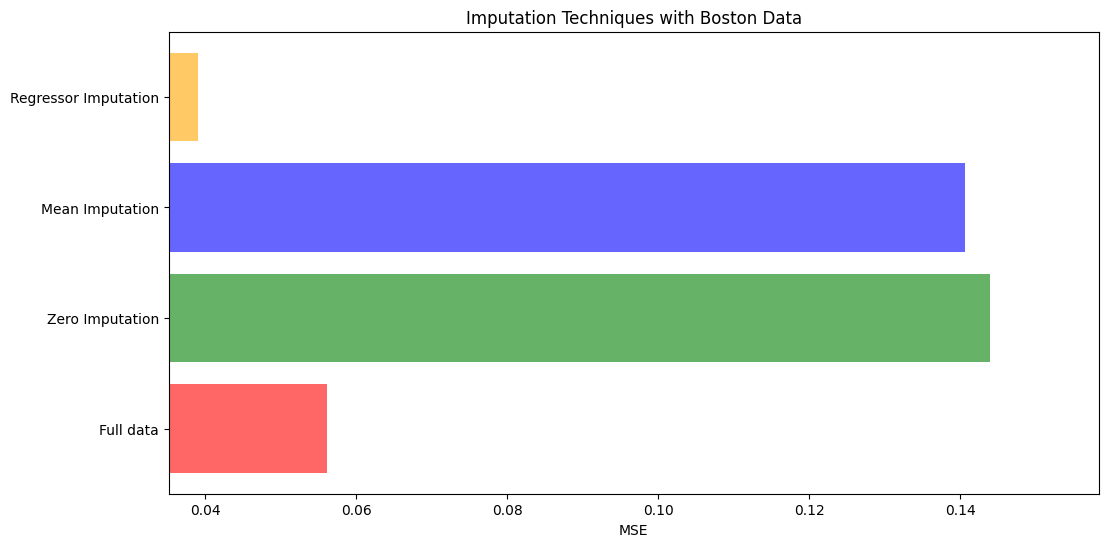

In [28]:
x_labels = ['Full data',
            'Zero Imputation',
            'Mean Imputation',
            'Regressor Imputation']
colors = ['r', 'g', 'b', 'orange']
plt.figure(figsize=(12, 6))
ax = plt.subplot(111)
for i in np.arange(len(mse)):
    ax.barh(i, mse[i],color=colors[i], alpha=0.6, align='center')
ax.set_title('Imputation Techniques with Boston Data')
ax.set_xlim(left=np.min(mse) * 0.9,
             right=np.max(mse) * 1.1)
ax.set_yticks(np.arange(len(mse)))
ax.set_xlabel('MSE')
ax.set_yticklabels(x_labels)
plt.show()

In [1]:
import datetime
y = datetime.datetime(2020,10,10,0,0)

def add(y, m, s):
    y += datetime.timedelta(minutes=m,seconds=s)
    return y

In [4]:
y = add(y, 16,43)

In [5]:
y = add(y,23,32)
y = add(y,14,32)
y = add(y,17,32)
y = add(y,8,45)
y = add(y,7,52)
y = add(y,14,59)
y = add(y,34,48)
y = add(y,17,31)

In [6]:
y

datetime.datetime(2020, 10, 10, 2, 36, 14)